In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import cv2
import random
import tensorflow as tf

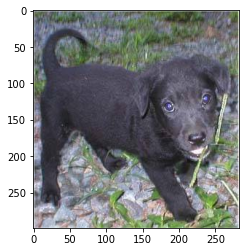

size of this image: (299, 283, 3)


In [61]:
img = cv2.imread(r'./cat_dog_2000_images/dogs/dog.4052.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
print("size of this image:", img.shape)

In [62]:
import glob

def get_label_from_name(path):
    if "cat." in path:
        return 0
    if "dog." in path:
        return 1
    return "n/a" # TODO: Raise error

def image_preprocessing(img, size = (64,32), flatten = True, color = False):
    img = cv2.resize(img, size)
    if not color:
        img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    if flatten:
        img = img.reshape(-1)
    return img

def load_features_labels(folder, size = (64,32), flatten = True, color = False):
    features, labels = [], []
    for file in glob.glob(folder + "/*/*.jpg"):
        img = cv2.imread(file)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = image_preprocessing(img, size, flatten, color)
        features.append(img)
        labels.append(get_label_from_name(file))   
    return features, labels

In [63]:
features, labels = load_features_labels("./cat_dog_2000_images", size=(128,128), color=True, flatten=False)
features = np.asarray(features)
labels = np.asarray(labels)
print("Shape feature vector:", features.shape)
print("Shape label vector:", labels.shape)

Shape feature vector: (2000, 128, 128, 3)
Shape label vector: (2000,)


In [64]:
labels[1110]

1

In [65]:
from sklearn.model_selection import train_test_split

def split_data(features, labels):
    return train_test_split(features, labels, train_size=0.7, stratify=labels, random_state=42)

X_train, X_test, y_train, y_test = split_data(features, labels)

In [66]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1400, 128, 128, 3), (600, 128, 128, 3), (1400,), (600,))

In [67]:
y_train = y_train.reshape(len(y_train), 1)
y_test = y_test.reshape(len(y_test), 1)

In [68]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1400, 128, 128, 3), (600, 128, 128, 3), (1400, 1), (600, 1))

In [69]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
model = Sequential([
    Conv2D(64, (3,3), activation = 'relu', input_shape = (128, 128, 3)),
    MaxPooling2D((2,2)),
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'softmax')
])

In [70]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [71]:
model.fit(X_train, y_train, epochs = 5, batch_size = 100)

Epoch 1/5
14/14 [==============================] - 18s 1s/step - loss: 7.6246 - accuracy: 0.5000
Epoch 2/5
14/14 [==============================] - 18s 1s/step - loss: 7.6246 - accuracy: 0.5000
Epoch 3/5
14/14 [==============================] - 18s 1s/step - loss: 7.6246 - accuracy: 0.5000
Epoch 4/5
14/14 [==============================] - 18s 1s/step - loss: 7.6246 - accuracy: 0.5000
Epoch 5/5
14/14 [==============================] - 19s 1s/step - loss: 7.6246 - accuracy: 0.5000


In [72]:
from sklearn.utils.class_weight import compute_sample_weight
model.fit(np.array(X_train), np.array(y_train), epochs = 2, batch_size = 100, validation_split=0.1, 
          verbose = 1, sample_weight=compute_sample_weight('balanced', y_train))


Epoch 1/2
13/13 [==============================] - 17s 1s/step - loss: 7.7699 - accuracy: 0.4905 - val_loss: 6.3175 - val_accuracy: 0.5857
Epoch 2/2
13/13 [==============================] - 16s 1s/step - loss: 7.7698 - accuracy: 0.4905 - val_loss: 6.3175 - val_accuracy: 0.5857


In [73]:
y_pred = model.predict(X_test)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       300
           1       0.50      1.00      0.67       300

    accuracy                           0.50       600
   macro avg       0.25      0.50      0.33       600
weighted avg       0.25      0.50      0.33       600



C:\Users\sohan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sohan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sohan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(33.0, 0.5, 'Truth')

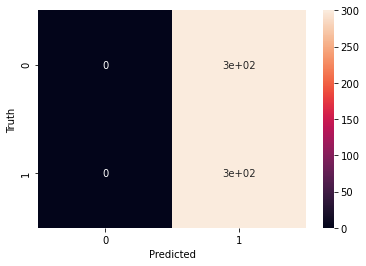

In [76]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test,y_pred)
ax=sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [48]:
model.evaluate(X_test, y_test)

19/19 [==============================] - 1s 62ms/step - loss: 7.6246 - accuracy: 0.5000


[7.624619007110596, 0.5]

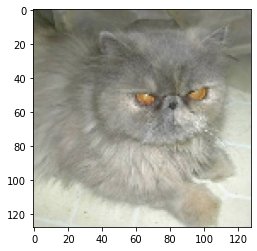

[[1.]] [0]


In [59]:
idx = random.randint(0, len(y_test))
plt.imshow(X_test[idx, :])
plt.show()
y_pred = model.predict(X_test[idx,:].reshape(1, 128, 128, 3))
print(y_pred, y_test[idx])

In [102]:
def split_data(features, labels):
    return train_test_split(features, labels, train_size=0.7, stratify=labels, random_state=42)

def encode_labels(y_train, y_test, returnEncoder=False):
    enc = OneHotEncoder(sparse=False) # Generate Encoder
    y_train = enc.fit_transform(y_train.reshape(-1, 1)) # Fit and transform training data
    y_test = enc.transform(y_test.reshape(-1, 1)) # Transform testing data
    if returnEncoder:
        return y_train, y_test, enc
    else:
        return y_train, y_test

X_train, X_test, y_train, y_test = split_data(features, labels)
y_train, y_test = encode_labels(y_train, y_test)
print("Label of first sample after OneHot encoding:", y_train[0])

Label of first sample after OneHot encoding: [1. 0.]


In [119]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
model2 = Sequential([
    Conv2D(64, (3,3), activation = 'relu', input_shape = (128, 128, 3)),
    MaxPooling2D((2,2)),
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(2, activation = 'sigmoid')
])

In [120]:
model2.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [121]:
model2.fit(X_train, y_train, epochs = 5, batch_size = 100)

Epoch 1/5
14/14 [==============================] - 18s 1s/step - loss: 56.1155 - accuracy: 0.5243
Epoch 2/5
14/14 [==============================] - 18s 1s/step - loss: 0.6730 - accuracy: 0.5929
Epoch 3/5
14/14 [==============================] - 18s 1s/step - loss: 0.5898 - accuracy: 0.7143
Epoch 4/5
14/14 [==============================] - 18s 1s/step - loss: 0.4586 - accuracy: 0.7957
Epoch 5/5
14/14 [==============================] - 18s 1s/step - loss: 0.3270 - accuracy: 0.8786


In [123]:
model2.fit(X_train, y_train, epochs = 5, batch_size = 100)

Epoch 1/5
14/14 [==============================] - 17s 1s/step - loss: 0.2115 - accuracy: 0.9293
Epoch 2/5
14/14 [==============================] - 17s 1s/step - loss: 0.1100 - accuracy: 0.9671
Epoch 3/5
14/14 [==============================] - 16s 1s/step - loss: 0.0646 - accuracy: 0.9843
Epoch 4/5
14/14 [==============================] - 16s 1s/step - loss: 0.0333 - accuracy: 0.9964
Epoch 5/5
14/14 [==============================] - 16s 1s/step - loss: 0.0223 - accuracy: 0.9979


In [125]:
model2.fit(X_train, y_train, epochs = 5, batch_size = 100)

Epoch 1/5
14/14 [==============================] - 17s 1s/step - loss: 0.0317 - accuracy: 0.9950
Epoch 2/5
14/14 [==============================] - 17s 1s/step - loss: 0.0470 - accuracy: 0.9907
Epoch 3/5
14/14 [==============================] - 17s 1s/step - loss: 0.0287 - accuracy: 0.9936
Epoch 4/5
14/14 [==============================] - 18s 1s/step - loss: 0.0139 - accuracy: 1.0000
Epoch 5/5
14/14 [==============================] - 17s 1s/step - loss: 0.0090 - accuracy: 0.9993


In [113]:
enc = OneHotEncoder(sparse=False) # Generate Encoder


In [116]:
def evaluate_model2(X_test, y_test, model2):
    import seaborn as sns
    from sklearn.metrics import confusion_matrix, classification_report
    
    y_pred = model2.predict(X_test)
    res = np.zeros_like(y_pred)
    for i in range(len(np.argmax(y_pred, axis=1))):
        res[i, np.argmax(y_pred,axis=1)[i]]=1
    y_pred = res
    cm = confusion_matrix(enc.inverse_transform(y_test), enc.inverse_transform(y_pred))
    ax=sns.heatmap(cm, annot=True)
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    print(classification_report(enc.inverse_transform(y_test), enc.inverse_transform(y_pred), zero_division=0))

In [122]:
model2.evaluate(X_test, y_test)

19/19 [==============================] - 2s 89ms/step - loss: 0.8929 - accuracy: 0.5417


[0.8928753733634949, 0.5416666865348816]

In [124]:
model2.evaluate(X_test, y_test)

19/19 [==============================] - 2s 95ms/step - loss: 1.9586 - accuracy: 0.5583


[1.9585744142532349, 0.5583333373069763]

In [126]:
model2.evaluate(X_test, y_test)

19/19 [==============================] - 2s 86ms/step - loss: 2.4271 - accuracy: 0.5633


[2.427128791809082, 0.5633333325386047]

#    
#    
# use CNN from ML1
#    

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import cv2
import random
import tensorflow as tf

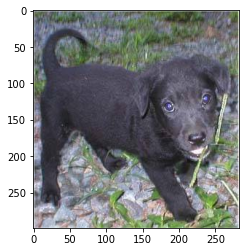

size of this image: (299, 283, 3)


In [18]:
img = cv2.imread(r'./cat_dog_2000_images/dogs/dog.4052.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
print("size of this image:", img.shape)

In [19]:
import glob

def get_label_from_name(path):
    if "cat." in path:
        return "cat"
    if "dog." in path:
        return "dog"
    return "n/a" # TODO: Raise error

def image_preprocessing(img, size = (64,32), flatten = True, color = False):
    img = cv2.resize(img, size)
    if not color:
        img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    if flatten:
        img = img.reshape(-1)
    return img

def load_features_labels(folder, size = (64,32), flatten = True, color = False):
    features, labels = [], []
    for file in glob.glob(folder + "/*/*.jpg"):
        img = cv2.imread(file)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = image_preprocessing(img, size, flatten, color)
        features.append(img)
        labels.append(get_label_from_name(file))   
    return features, labels

In [20]:
features, labels = load_features_labels("./cat_dog_2000_images", size=(128,128), color=True, flatten=False)
features = np.asarray(features)
labels = np.asarray(labels)
print("Shape feature vector:", features.shape)
print("Shape label vector:", labels.shape)

Shape feature vector: (2000, 128, 128, 3)
Shape label vector: (2000,)


In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

def split_data(features, labels):
    return train_test_split(features, labels, train_size=0.7, stratify=labels, random_state=42)

def encode_labels(y_train, y_test, returnEncoder=False):
    enc = OneHotEncoder(sparse=False) # Generate Encoder
    y_train = enc.fit_transform(y_train.reshape(-1, 1)) # Fit and transform training data
    y_test = enc.transform(y_test.reshape(-1, 1)) # Transform testing data
    if returnEncoder:
        return y_train, y_test, enc
    else:
        return y_train, y_test

X_train, X_test, y_train, y_test = split_data(features, labels)
y_train, y_test = encode_labels(y_train, y_test)
print("Label of first sample after OneHot encoding:", y_train[0])

Label of first sample after OneHot encoding: [1. 0.]


In [22]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, Dropout, MaxPooling2D, GlobalMaxPooling2D

model = Sequential()
model.add(Conv2D(8, 5,  input_shape = X_train[0].shape, activation = 'relu', padding="same"))
model.add(MaxPooling2D())
model.add(Conv2D(16, 3, activation = 'relu', padding="same"))
model.add(MaxPooling2D())
model.add(Conv2D(32, 3, activation = 'relu', padding="same"))
model.add(GlobalMaxPooling2D())
model.add(Dense(32, activation = 'relu'))
model.add(Dense(y_train[0].shape[0], activation = 'softmax'))

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 128, 128, 8)       608       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 64, 8)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 64, 16)        1168      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
global_max_pooling2d_1 (Glob (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)               

In [23]:
from tensorflow.keras.optimizers import Adam
optimizer=Adam(learning_rate=0.001)
model.compile(loss = 'categorical_crossentropy', optimizer = optimizer, metrics = ['accuracy'])

In [24]:
from sklearn.utils.class_weight import compute_sample_weight
model.fit(np.array(X_train), np.array(y_train), epochs = 2, batch_size = 100, validation_split=0.1, 
          verbose = 1, sample_weight=compute_sample_weight('balanced', y_train))


Epoch 1/2
13/13 [==============================] - 5s 372ms/step - loss: 10.5065 - accuracy: 0.5040 - val_loss: 1.3991 - val_accuracy: 0.5929
Epoch 2/2
13/13 [==============================] - 5s 359ms/step - loss: 1.1950 - accuracy: 0.4992 - val_loss: 0.8682 - val_accuracy: 0.5143


In [8]:
model.fit(np.array(X_train), np.array(y_train), epochs = 2, batch_size = 100, validation_split=0.1, 
          verbose = 1, sample_weight=compute_sample_weight('balanced', y_train))

Epoch 1/2
13/13 [==============================] - 5s 364ms/step - loss: 1.1218 - accuracy: 0.5135 - val_loss: 0.8609 - val_accuracy: 0.5857
Epoch 2/2
13/13 [==============================] - 5s 358ms/step - loss: 0.9061 - accuracy: 0.5524 - val_loss: 0.8177 - val_accuracy: 0.5786


In [9]:
model.fit(np.array(X_train), np.array(y_train), epochs = 2, batch_size = 100, validation_split=0.1, 
          verbose = 1, sample_weight=compute_sample_weight('balanced', y_train))

Epoch 1/2
13/13 [==============================] - 5s 368ms/step - loss: 0.8274 - accuracy: 0.5889 - val_loss: 0.7326 - val_accuracy: 0.5929
Epoch 2/2
13/13 [==============================] - 5s 365ms/step - loss: 0.7683 - accuracy: 0.6008 - val_loss: 0.8426 - val_accuracy: 0.5643


In [29]:
model.fit(X_train, y_train, epochs = 2, batch_size = 100, validation_split=0.2, verbose = 1)

Epoch 1/2
12/12 [==============================] - 4s 373ms/step - loss: 0.8951 - accuracy: 0.5277 - val_loss: 0.9121 - val_accuracy: 0.4679
Epoch 2/2
12/12 [==============================] - 5s 376ms/step - loss: 0.7834 - accuracy: 0.5402 - val_loss: 0.7937 - val_accuracy: 0.4893


In [37]:
def evaluate_model(X_test, y_test, model):
    import seaborn as sns
    from sklearn.metrics import confusion_matrix, classification_report
    
    y_pred = model.predict(X_test)
    res = np.zeros_like(y_pred)
    for i in range(len(np.argmax(y_pred, axis=1))):
        res[i, np.argmax(y_pred,axis=1)[i]]=1
    y_pred = res
    cm = confusion_matrix(enc.inverse_transform(y_test), enc.inverse_transform(y_pred))
    ax=sns.heatmap(cm, annot=True)
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    print(classification_report(enc.inverse_transform(y_test), enc.inverse_transform(y_pred), zero_division=0))

In [10]:
model.evaluate(X_test, y_test)

19/19 [==============================] - 1s 30ms/step - loss: 0.9482 - accuracy: 0.5350


[0.9481844902038574, 0.5350000262260437]

In [31]:
ypred = model.predict(X_test)

In [32]:
ypred

array([[0.5870518 , 0.41294822],
       [0.73224896, 0.26775107],
       [0.53753644, 0.4624636 ],
       ...,
       [0.41577062, 0.58422935],
       [0.32911634, 0.67088366],
       [0.3146271 , 0.6853729 ]], dtype=float32)

In [36]:
threshold, upper, lower = 0.5, 1, 0
ypred[ypred>threshold] = upper
ypred[ypred<=threshold] = lower

In [38]:
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.54      0.43      0.48       300
           1       0.53      0.63      0.57       300

   micro avg       0.53      0.53      0.53       600
   macro avg       0.53      0.53      0.53       600
weighted avg       0.53      0.53      0.53       600
 samples avg       0.53      0.53      0.53       600



In [40]:
def evaluate_model(X_test, y_test, model):
    import seaborn as sns
    from sklearn.metrics import confusion_matrix, classification_report
    
    y_pred = model.predict(X_test)
    
    threshold, upper, lower = 0.5, 1, 0
    y_pred[y_pred>threshold] = upper
    y_pred[y_pred<=threshold] = lower
    
   
    cm = confusion_matrix(enc.inverse_transform(y_test), enc.inverse_transform(y_pred))
    ax=sns.heatmap(cm, annot=True)
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    print(classification_report(enc.inverse_transform(y_test), enc.inverse_transform(y_pred), zero_division=0))

In [46]:
#evaluate_model(X_test, y_test, model)
y_pred = model.predict(X_test)
y_pred

array([[0.5870518 , 0.41294822],
       [0.73224896, 0.26775107],
       [0.53753644, 0.4624636 ],
       ...,
       [0.41577062, 0.58422935],
       [0.32911634, 0.67088366],
       [0.3146271 , 0.6853729 ]], dtype=float32)

In [47]:
threshold, upper, lower = 0.5, 1, 0
y_pred[y_pred>threshold] = upper
y_pred[y_pred<=threshold] = lower
y_pred

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [49]:
y_train

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [50]:
y_test

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.54      0.43      0.48       300
           1       0.53      0.63      0.57       300

   micro avg       0.53      0.53      0.53       600
   macro avg       0.53      0.53      0.53       600
weighted avg       0.53      0.53      0.53       600
 samples avg       0.53      0.53      0.53       600



In [59]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test,y_pred)
ax=sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

ValueError: multilabel-indicator is not supported

In [52]:
y_pred = model.predict(X_test)
res = np.zeros_like(y_pred)
for i in range(len(np.argmax(y_pred, axis=1))):
    res[i, np.argmax(y_pred,axis=1)[i]]=1
y_pred = res
y_pred

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [57]:
ylab = enc.inverse_transform(y_train)

NotFittedError: This OneHotEncoder instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [56]:
y_test

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])